# Creating Analytical Dataset Project

## Business Problem

Pawdacity is a leading pet store chain in Wyoming with 13 stores throughout the state. This year, Pawdacity would like to expand and open a 14th store. Your manager has asked you to perform an analysis to recommend the city for Pawdacity’s newest store, based on predicted yearly sales.

Here are the criterias given for choosing the right city:

- The new store should be located in a new city. That means there should be no existing stores in the new city.
- The total sales for the entire competition in the new city should be less than \\$500,000
- The new city where you want to build your new store must have a population over 4,000 people (based upon the 2014 US Census estimate).
- The predicted yearly sales must be over $200,000.
- The city chosen has the highest predicted sales from the predicted set.

## Data Provided

- The monthly sales data for all of the Pawdacity stores for the year 2010.

- NAICS data on the most current sales of all competitor stores where total sales is equal to 12 months of sales.

- A partially parsed data file that can be used for population numbers.

- Demographic data (Households with individuals under 18, Land Area, Population Density, and Total Families) for each city and county in the state of Wyoming. For people who are unfamiliar with the US city system, a state contains counties and counties contains one or more cities.

## Building the training dataset

To properly build the model, and select predictor variables, create a dataset with the following columns:

- City
- 2010 Census Population
- Total Pawdacity Sales
- Households with Under 18
- Land Area
- Population Density
- Total Families

This dataset will be your training set to help you build a regression model in order to predict sales.

### Steps for creating the dataset

I started with the Web Scraped Data from the Wyoming Wikipedia page, and used text to columns and select tools and the Data Cleansing to parse out the City, County, 2010 Census, and 2014 Estimate and remove all of the extra punctuation.

For the demographic data, I used the Auto-field tool to combine all of the numbers labeled as String fields.Before each join, I summarized the amounts by city to ensure that there were no duplicate city names within the data.

For Pawdacity sales file, I transposed the data to get City, Month, and Amount, and then summarized by City to get the total amount for each city.

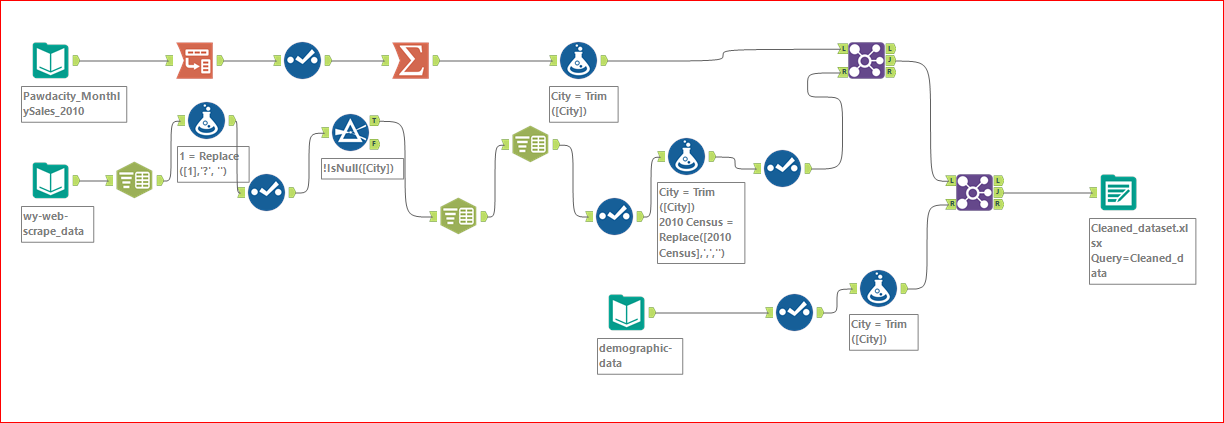

In [1]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
wf_image=Image(filename="CreateAnalyticalDataSet_Workflow.PNG")
wf_image

## Build a Linear Regression Model


I created my data set used to train my regression model.Once the model was created, I applied the model to the cities that were not already in the Pawdacity Sales file by taking the left output from the join on the Pawdacity sales file. I took the competitor data with an autofield tool and joined it, with a formula off of the left join to create a 0 in the Competitor Amount so I could union the cities that have no competitor backinto the overall dataset. I don’t want to exclude cities where no competitors are present.I then applied the filters laid out in the project plan to come up with my list of possible cities, andsorted on the expected revenue to bring the best choice to the top.

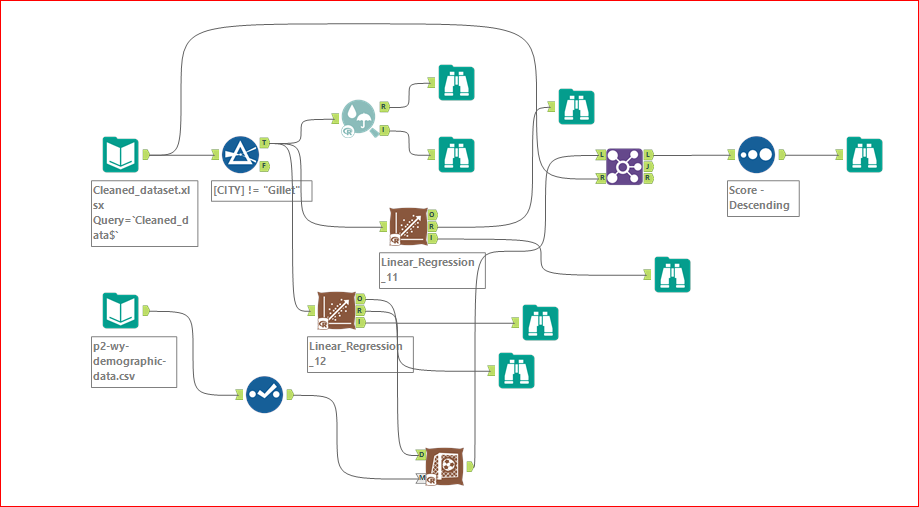

In [2]:
LR_image=Image(filename="Linear_Regression_Workflow.PNG")
LR_image

## Perform the Analysis

> 1. How and why did you select the predictor variables in your model? You must show that each predictor variable has a linear relationship with your target variable with a scatterplot.

I first plotted each predictor variable against my target variable. I can conclude all predictor variables are good potential predictor variables because they show a linear relationship between sales.

In [6]:
cr_image1=Image(filename="SalesVsArea.PNG")
cr_image2=Image(filename="SalesVsCensus.PNG")
cr_image3=Image(filename="SalesVsHousehold.PNG")
cr_image4=Image(filename="SalesVsPopulation.PNG")
cr_image5=Image(filename="SalesVsTotalFamily.PNG")

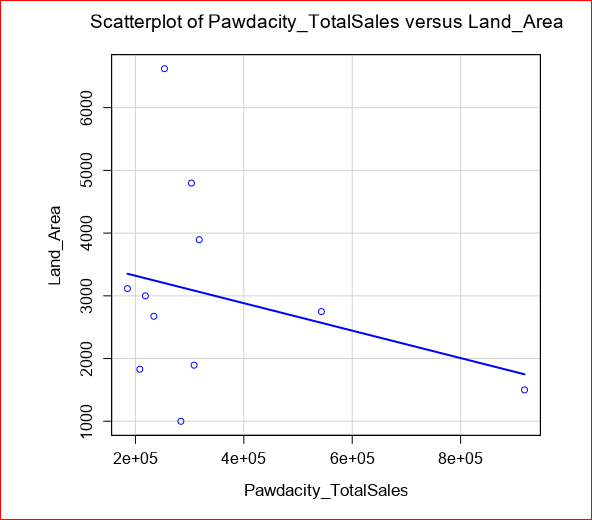

In [7]:
cr_image1

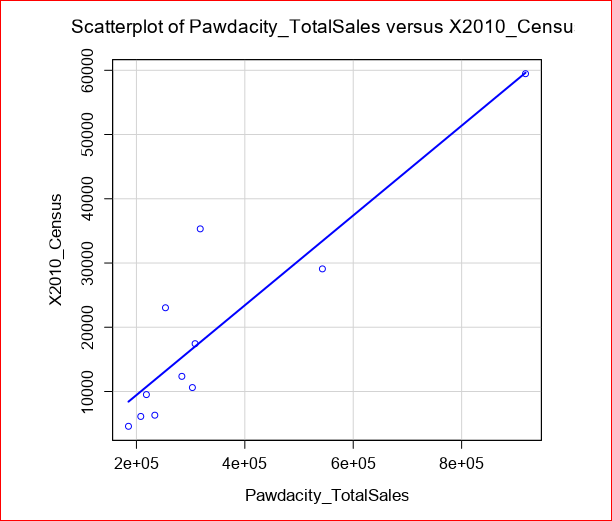

In [8]:
cr_image2

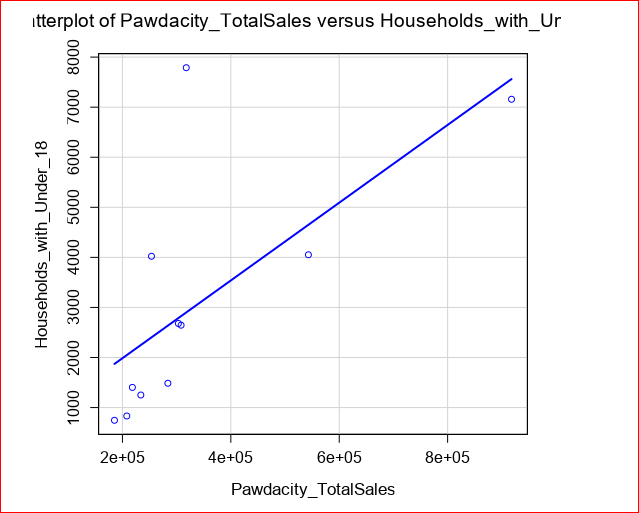

In [9]:
cr_image3

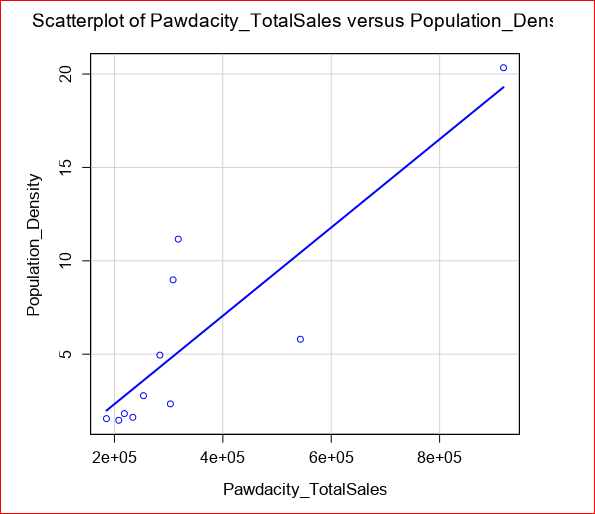

In [10]:
cr_image4

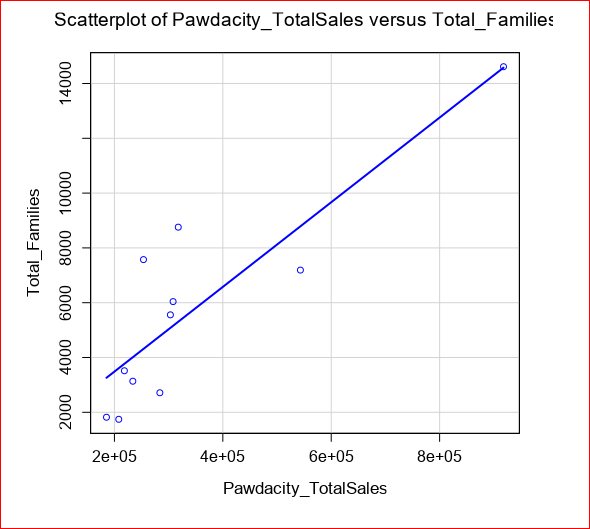

In [11]:
cr_image5

I checked for correlations between my predictor variables to see if there is any possibility of multicollinearity in my dataset. Below is a table that shows the correlations between the different predictor variables:

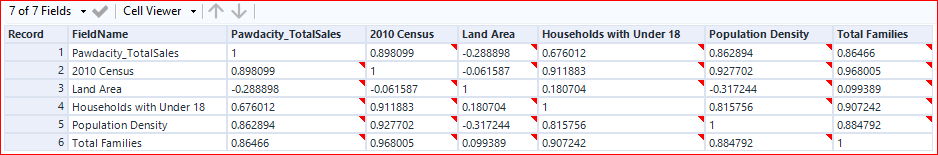

In [12]:
cr_image=Image(filename="Correlation_Analysis.PNG")
cr_image

We can see that HHU18, Census, Families, and PDensity (Population Density) have strong correlations which each other. Land area however, is not as highly correlated. So I started by using land area as one predictor and then tested the four variables that are correlated. I’ve found out that using `land area` and `total families` as the predictor variables produced the best model.

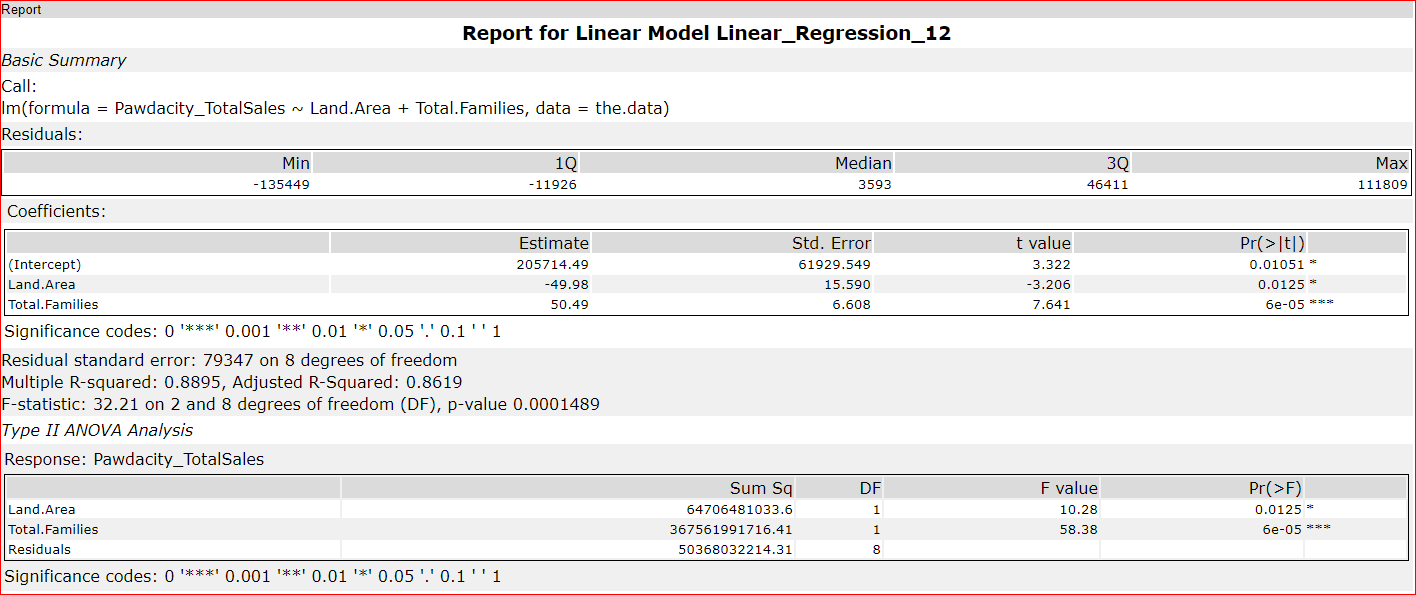

In [14]:
report_image=Image(filename="Linear_Regression Report.PNG")
report_image

> 2.Explain why you believe your linear model is a good model.

The p-values for land area and total families are both below 0.05 and the Multiple R-squared value is at .8895 which is close to 1. This is model is a decent model.

> 3. What were the sales prediction steps did you do?

I filtered my cities according to the given the criteria in the project and calculated revenue off the population density information using my linear model.

> 4. Which city would you recommend and why did you recommend this city?

I would recommend the city of Laramie with a predicted sales of \\$315812.73.